# Basics of quantum computing, reminder

Disclaimer : I am not an expert but a learner, so the statements I made may not necessarily be correct or incorrect, may be a superposition of both.

Link to the book - https://qiskit.org/textbook/what-is-quantum.html

Some basic reminders on notations that are useful (I hope).

In classical computing (c) the bits are 0 and 1.
Now in quantum computing, we use qubits.
Here are the orthogonal vectors, ket for column vectors and bra for row vectors
$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \, \, \, \, 
|1\rangle =\begin{bmatrix} 0 \\ 1 \end{bmatrix}.$

![image-3.png](../figures/lecture4.png)

Image taken from "Dancing with Qubits" by Robert S. Sutor, Copyright © 2019 Packt Publishing

We have other vectors

$|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$,

$|-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix}$

WHEN IN DOUBT, ALWAYS LOOK FOR SECOND ELEMENT

Image taken from the qiskit textbook (https://qiskit.org/textbook/ch-states/introduction.html).

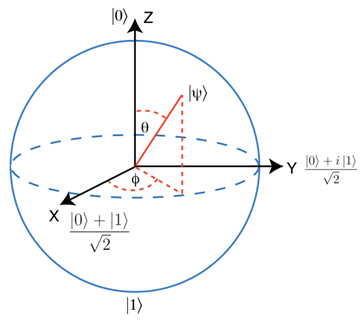

Then comes more complex statevector
$|q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix} = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle .$

# Different gates

Then we have to apply quantum gates, operations, to these qubits. We draw quantum circuits qc = QuantumCircuit(no of inputs), each gates are represented by their standard notation. 
Some most frequent gates we learnt are Pauli gates i.e.  X-gate denoted by  qc.x(), Y-gate denoted by qc.y(), Z-gate denoted by qc.z() and Hadmart gate i.e. H-gate and denoted by qc.h(). Here are their definitions.


$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0|$.  It behaves like a not gate: $X|0\rangle = |1\rangle$ and $X|1\rangle = |0\rangle$

$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = -i|0\rangle\langle1| + i|1\rangle\langle0|$ 

$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0\rangle\langle0| - |1\rangle\langle1|$

$H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$. It behaves like this: $H|0\rangle = |+\rangle$ and $H|1\rangle = |-\rangle$

There are also R_phi, I, S, and T gates.

# Lets draw an X-gate on a $|0\rangle$ state
Begin by importing the necessary tools and packages, and see the output which should be $|1\rangle$

In [1]:
import qiskit

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [3]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

Here is initial state
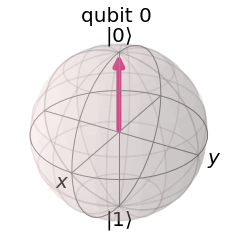

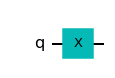

In [33]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

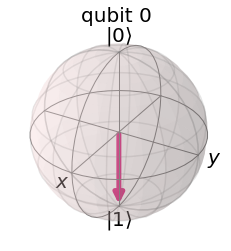

In [5]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

In [6]:
#this is taken from book, no need to repeat
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

# Two and multiple qubits

This has been previously discussed, add notes later but skip for now.
Also add the matrix multiplication and tensor product. If we have $|a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix}$. Then the tensor product is
$|ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix}$

One qubit has two states. Now when two qubits are used there are four possible states. They are 00, 01, 10, 11.



# Entanglement and visualisation with Bloch and Q-sphere

Entangled states are discussed around here.

# The controlled-NOT i.e. CNOT gate, denoted as qc.cx()
CNOT gate in quantum computing is equivalent of XOR gate in calssical/traditional case. It is denoted with a dot on the top (control input) and a plus inside a circle on the bottom (target input). So let's look at it. 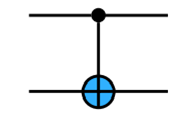


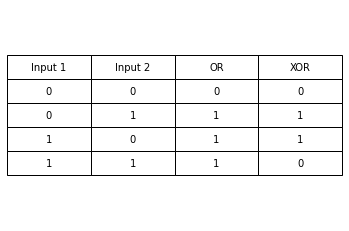

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data = [[0,0,0,0],[0,1,1,1],[1,0,1,1], [1,1,1,0]]

table = plt.table(cellText=data, colLabels=['Input 1', 'Input 2', 'OR', 'XOR'], loc='center', cellLoc='center', colColours= None)
table.auto_set_font_size(True)
h = table.get_celld()[(0,0)].get_height()
w = table.get_celld()[(0,0)].get_width()
table.scale(1, 2)
plt.axis('off')
plt.show()


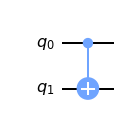

In [32]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw('mpl')

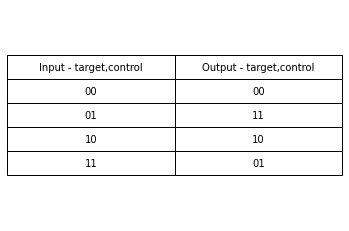

In [30]:
#CNOT operation table
data = [['00','00'],['01',11],[10,10], [11,'01']]
#there is problem when writing 00, 01 etc. so using '00' '01' and so on
table = plt.table(cellText=data, colLabels=['Input - target,control', 'Output - target,control'], 
                  loc='center', cellLoc='center', colColours= None)
table.auto_set_font_size(True)
h = table.get_celld()[(0,0)].get_height()
w = table.get_celld()[(0,0)].get_width()
table.scale(1, 2)
plt.axis('off')
plt.show()

# CNOT looks at control input, if it is 1 then inverts (NOT operation, i.e. X-gaye) the target at the output, otherwise does nothing.

There are two form of CNOT matrix (depending position of target and control), qiskit uses this on  form it is represented as 
$\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}$
              
              
Here is the example (from book) of generating $|0+\rangle$ state and then using CNOT to it.
Remember:
$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $ and $|1\rangle =\begin{bmatrix} 0 \\ 1 \end{bmatrix}.$

$|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$,

$|-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix}$


In [10]:
# here trying to get the tensor product in python
import array
A=[1,2,3]
B=[[1],[0],[1],[0]]
np.tensordot(B, A, axes=0)

array([[[1, 2, 3]],

       [[0, 0, 0]],

       [[1, 2, 3]],

       [[0, 0, 0]]])

In [11]:
#ket_0=[1, 0]
#ket_1=[0, 1]
#arr_ket_0=np.array(ket_0).reshape(2,1)
#arr_ket_1=np.array(ket_1).reshape(2,1)
#ZeroZero = np.tensordot(arr_ket_0, arr_ket_1, axes =0)
#print ('00 is = ', ZeroZero)

ket_0=[[1],[0]]
ket_1=[[0],[1]]
ZeroZero =np.tensordot(ket_0, ket_0, axes=0)
ZeroOne =np.tensordot(ket_0, ket_1, axes=0)
OneZero =np.tensordot(ket_1, ket_0, axes=0)
OneOne =np.tensordot(ket_1, ket_1, axes=0)
#print (arr_ket_0)
print ('00 is = ', ZeroZero, 
       '01 is = ', ZeroOne, 
       '10 is = ', OneZero, 
       '11 is = ', OneOne)


00 is =  [[[[1]
   [0]]]


 [[[0]
   [0]]]] 01 is =  [[[[0]
   [1]]]


 [[[0]
   [0]]]] 10 is =  [[[[0]
   [0]]]


 [[[1]
   [0]]]] 11 is =  [[[[0]
   [0]]]


 [[[0]
   [1]]]]


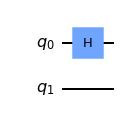

In [31]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [13]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

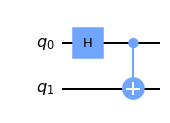

In [14]:
# Apply H-gate to the first:
qc = QuantumCircuit(2)
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

Something weird happend here in the diagram, not sure why

In [15]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

# This exercise showed that $\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$, which is an entangled state.

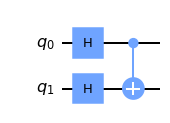

In [34]:
#applying H gate to two inputs and then a CNOT
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw('mpl')

Let's apply this to the $|{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$
Reminder $|00\rangle = \begin{bmatrix}
1 \\
0 \\
0 \\
0
\end{bmatrix}$, $|01\rangle = \begin{bmatrix}
0 \\
1 \\
0 \\
0
\end{bmatrix}$ $ |10\rangle  = \begin{bmatrix}
0 \\
0 \\
1 \\
0
\end{bmatrix}$ and $|11\rangle \begin{bmatrix}
0 \\
0 \\
0 \\
1
\end{bmatrix}$

<IPython.core.display.Math object>

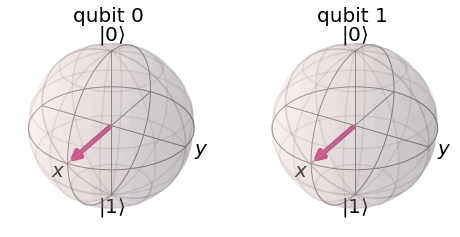

In [17]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

Since the CNOT swaps the amplitudes of |01⟩  and |11⟩ , we saw no change.

Let's apply this to the $|{-}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)$. It is very similar to $|{+}{+}\rangle$ but the last two terms with negative sign.

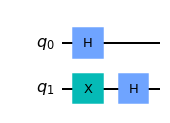

<IPython.core.display.Math object>

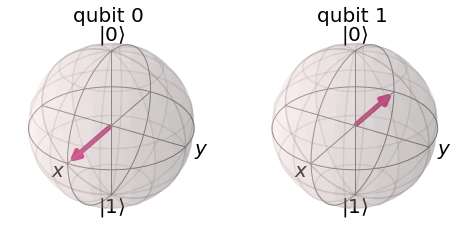

In [35]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw('mpl'))
# See the result
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

# $\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
                           & = |{-}{-}\rangle
\end{aligned}$

This is interesting, because it affects the state of the control qubit while leaving the state of the target qubit (- in this case) unchanged. i.c. opposite of what we begin with (control was + to begin with) and finally changed to (-) 

# This means the CNOT matrix that we are using for (target, control) is flipped. i.e.

$\text{CNOT (t,c)} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT (c,t)} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}$

This is represented as 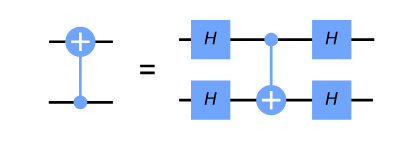 and called the phase kickback.

# Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation.

When CNOT operates to |-0> it did not change but to |-1> we get the global phase, i.e. the - sign in front of the qubit.

$\begin{aligned}
\text{CNOT}|{-}0\rangle & = |{-}\rangle \otimes |0\rangle \\
                        & = |{-}0\rangle \\
                        \quad & \\
\text{CNOT}|{-}1\rangle & = X|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}1\rangle \\
\end{aligned}$

# This idea further applied to superposition state in the control qubit (i.e. changing control qubit 1 to +), gave the phase to the control qubit.

$\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{\sqrt{2}}(\text{CNOT}|{-}0\rangle + \text{CNOT}|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle + X|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle -|{-}1\rangle) \\
\end{aligned}$

Consequence of phase kickback 


Wrapping the CNOT in H-gates transforms the qubits from the computational basis to the(|+⟩,|−⟩)  basis, where we see this effect. This identity is very useful in hardware, since some hardwares only allow for CNOTs in one direction between two specific qubits. We can use this identity to overcome this problem and allow CNOTs in both directions.

# Then there is discussion on more general case of applying any controlled-gate, with U

$\begin{aligned}
\text{U} & = 
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & = 
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}$


Here I is the identity matrix.

Here is the example from book on using controlled-T gate. Reminder T gate is $\text{T} = 
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}\\
\end{bmatrix}$ 

and controlled-T (denoted by cp(pi/4, , ) is $\text{Controlled-T} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/4}\\
\end{bmatrix}$

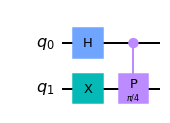

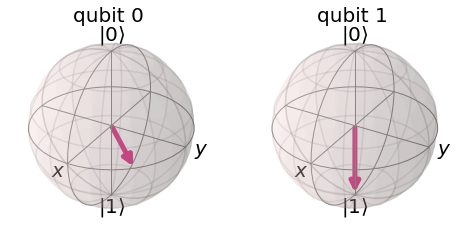

In [36]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw('mpl'))
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

# Making a Controlled-Z from a CNOT


Just as the CNOT applies an X to its target qubit whenever its control is in state |1⟩ , the controlled- Z applies a Z in the same case. 

Remember $X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0|$.  It behaves like a not gate: $X|0\rangle = |1\rangle$ and $X|1\rangle = |0\rangle$

$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = -i|0\rangle\langle1| + i|1\rangle\langle0|$ 

$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0\rangle\langle0| - |1\rangle\langle1|$

$H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$. It behaves like this: $H|0\rangle = |+\rangle$ and $H|1\rangle = |-\rangle$

And HXH = Z and  HZH =X, we are going to make a controlled-Z in a similar way.


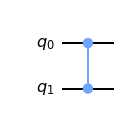

In [37]:
# a controlled-Z, notation
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1
qc.cz(c,t)
qc.draw('mpl')

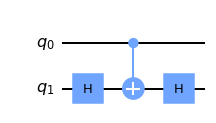

In [38]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw('mpl')

# Generalize this for other gates


a controlled- Y
 

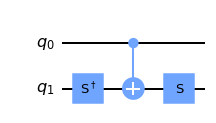

In [39]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t) # sdg means a s-dagger
qc.cx(c,t)
qc.s(t)
qc.draw('mpl')

# Swapping Qubits

This is used when we need to move information around, say we have qubits a, and b and we want to make a -> b and vice versa, then we use swap gate. It is denoted by a cross on each qubit and connect them by a straight line. see below 

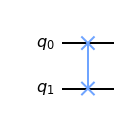

In [40]:
a = 0
b = 1

qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw('mpl')

Then use CNOT gate from a to b followed by the flipped CNOT from b to a.

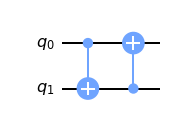

In [41]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw('mpl')

# Controlled Rotations

We can also make a controlled version of any single-qubit rotation,  
V
 . For this we simply need to find three rotations A, B and C, and a phase  
α
  such that  
  
  $ABC = I, ~~~e^{i\alpha}AZBZC = V$

In [25]:
from qiskit.circuit import Gate
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit

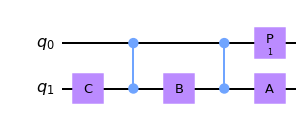

In [42]:
qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.p(alpha,c)
qc.draw('mpl')

# The Toffoli

The Toffoli gate is a three-qubit gate with two controls and one target. It performs an X on the target only if both controls are in the state |1⟩. It is a controlled-controlled-NOT (CCX) gate.

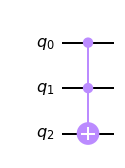

In [43]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw('mpl')

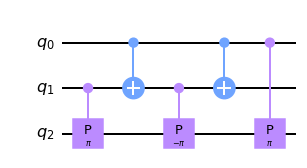

In [44]:
qc = QuantumCircuit(3)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw('mpl')